In [83]:
import pandas as pd
import numpy as np
%matplotlib inline

In [84]:
import seaborn as sns

In [85]:
train_data = pd.read_csv('titanic/train.csv')

In [86]:
test_data = pd.read_csv('titanic/test.csv')

In [87]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [89]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [90]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [91]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E31BB92160>,
      dtype=object)

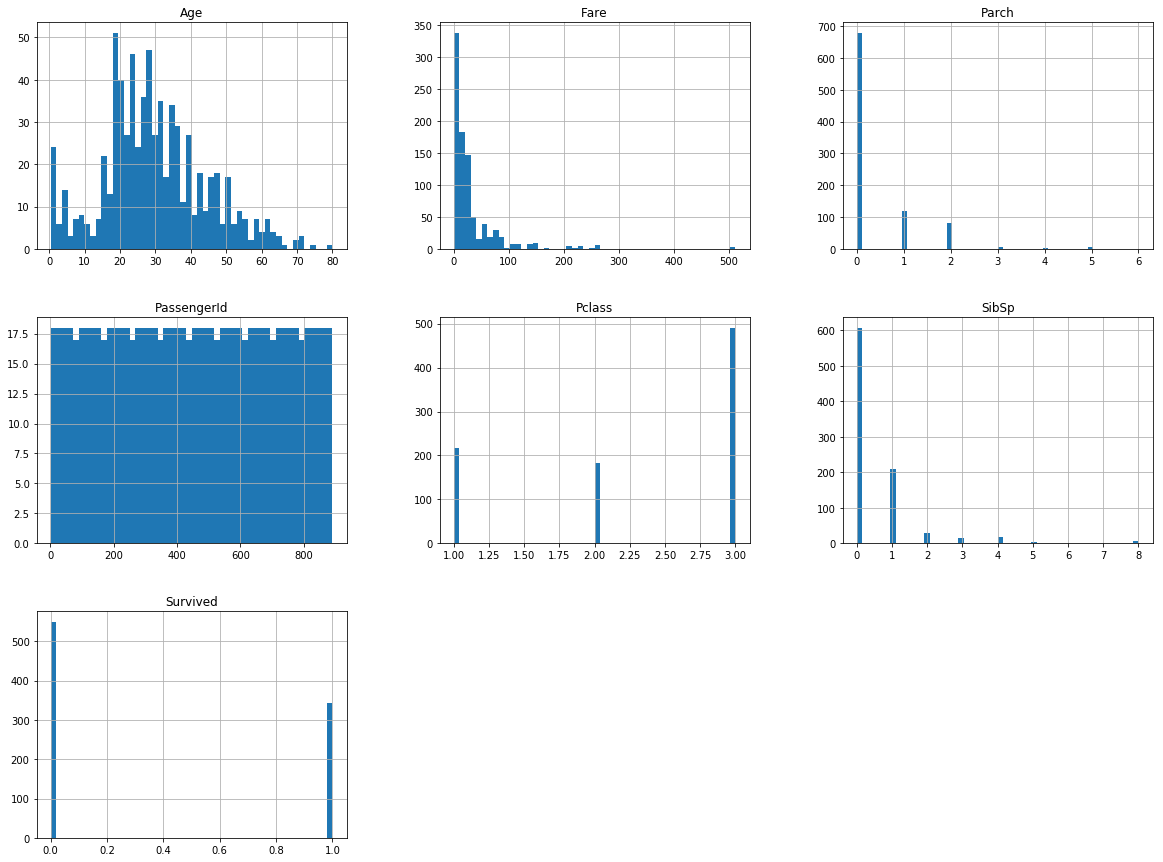

In [92]:
train_data.hist(bins=50,figsize=(20,15))

In [93]:
corr_matrix = train_data.corr()

In [94]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [95]:
train_data.drop('Cabin',axis=1,inplace=True)

In [96]:
test_data.drop('Cabin',axis=1, inplace=True)

In [97]:
from sklearn.impute import SimpleImputer

In [98]:
imp = SimpleImputer(strategy='mean')

In [99]:
imp.fit(train_data[['Age']])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [100]:
train_data['Age'] = imp.transform(train_data[['Age']]).ravel()

In [101]:
imp.fit(test_data[['Age']])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [102]:
test_data['Age'] = imp.transform(test_data[['Age']]).ravel()

In [103]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [104]:
def set_alone(df):
    df['is_alone'] = pd.Series(np.zeros(891))
    for i in range(len(df)):
        if df.loc[i,'SibSp'] == 0 and df.loc[i,'Parch'] == 0:
            df.loc[i,'is_alone'] = 1
        else:
            df.loc[i,'is_alone'] = 0

In [105]:
set_alone(train_data)

In [106]:
set_alone(test_data)

In [107]:
train_data['is_alone'].value_counts()

1.0    537
0.0    354
Name: is_alone, dtype: int64

In [108]:
test_data['is_alone'].value_counts()

1.0    253
0.0    165
Name: is_alone, dtype: int64

In [109]:
from sklearn.preprocessing import LabelEncoder

In [110]:
le = LabelEncoder()

In [111]:
train_data['Sex'] = le.fit_transform(train_data['Sex'])

In [112]:
train_data['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [113]:
test_data['Sex'] = le.fit_transform(test_data['Sex'])

In [114]:
train_data.drop('Ticket',axis=1,inplace=True)

In [115]:
test_data.drop('Ticket',axis=1,inplace=True)

In [116]:
df_encoded = pd.get_dummies(train_data['Embarked'])

In [117]:
train_data = pd.concat([train_data,df_encoded],axis=1)

In [118]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,is_alone,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,0.0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,0.0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,1.0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,0.0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,1.0,0,0,1


In [119]:
df_encoded = pd.get_dummies(test_data['Embarked'])

In [120]:
test_data = pd.concat([test_data,df_encoded],axis=1)

In [121]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,is_alone,C,Q,S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,Q,1.0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,S,0.0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,Q,1.0,0,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,S,1.0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,S,0.0,0,0,1


In [122]:
train_data.drop('Embarked',inplace=True,axis=1)

In [123]:
test_data.drop('Embarked',inplace=True,axis=1)

In [124]:
df_encoded = pd.get_dummies(train_data['Pclass'])

In [125]:
train_data = pd.concat([train_data,df_encoded],axis=1)

In [126]:
train_data.drop('Pclass',axis=1,inplace=True)

In [127]:
df_encoded = pd.get_dummies(test_data['Pclass'])

In [128]:
test_data = pd.concat([test_data,df_encoded],axis=1)

In [129]:
test_data.drop('Pclass',axis=1,inplace=True)

In [130]:
train_data.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Fare,is_alone,C,Q,S,1,2,3
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0.0,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0.0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1.0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0.0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1.0,0,0,1,0,0,1


In [131]:
train_data.drop('Name',axis=1,inplace=True)

In [132]:
test_data.drop('Name',axis=1,inplace=True)

In [133]:
from pandas.plotting import scatter_matrix

In [134]:
X_train = train_data.drop(['PassengerId','Survived'],axis=1)
y_train = train_data['Survived']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E31C84F7B8>,
      dtype=object)

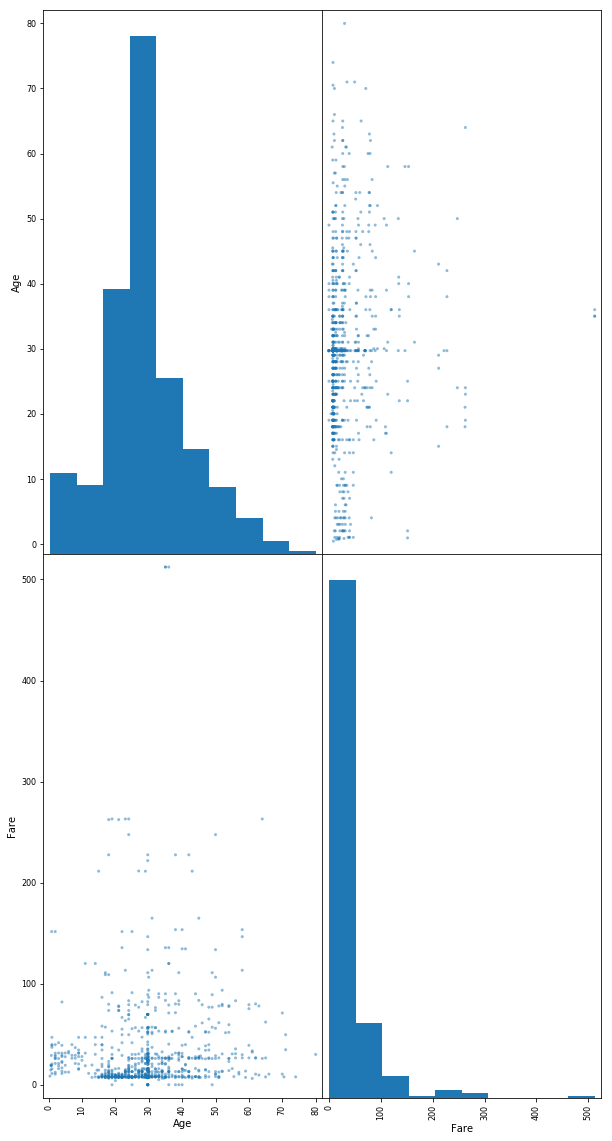

In [135]:
scatter_matrix(X_train[['Age','Fare']],figsize=(10,20))

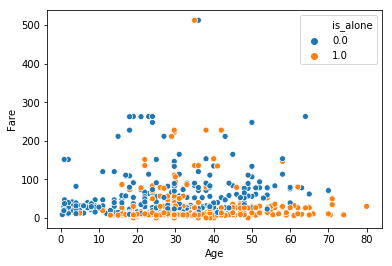

In [136]:
ax = sns.scatterplot(x='Age', y='Fare', data=X_train,hue='is_alone')

In [137]:
X_test = test_data.drop(['PassengerId'],axis=1)

In [149]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [151]:
X_test['Fare'].replace(np.nan,np.mean(X_test['Fare']),inplace=True)

In [152]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
Sex         418 non-null int32
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
is_alone    418 non-null float64
C           418 non-null uint8
Q           418 non-null uint8
S           418 non-null uint8
1           418 non-null uint8
2           418 non-null uint8
3           418 non-null uint8
dtypes: float64(3), int32(1), int64(2), uint8(6)
memory usage: 20.5 KB


In [153]:
from sklearn import svm

In [154]:
clf = svm.LinearSVC(C=15,dual=False)

In [155]:
clf.fit(X_train,y_train)

LinearSVC(C=15, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [156]:
predictions = clf.predict(X_test) 

In [158]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
